In [15]:
##dealing with the imbalance nature of the data
##!pip install imblearn

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
cd datasets

[Errno 2] No such file or directory: 'datasets'
/Users/zhouxinrong/Desktop/PRESC/datasets


In [17]:
Surgical_data = pd.read_csv("Surgical-deepnet.csv")

In [18]:
Surgical_data

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


In [19]:
Surgical_data1 = pd.DataFrame(Surgical_data, columns=["bmi","Age","baseline_diabetes"])

In [20]:
Surgical_data1.describe()

,bmi,Age,baseline_diabetes
count,14635.000000,14635.000000,14635.000000
mean,31.295642,63.205268,0.120875
std,8.152709,18.088191,0.325993
min,2.150000,6.100000,0.000000
25%,26.510000,51.500000,0.000000
50%,28.980000,59.700000,0.000000
75%,35.295000,74.700000,0.000000
max,92.590000,90.000000,1.000000


In [21]:
Surgical_data1.dtypes

bmi                  float64
Age                  float64
baseline_diabetes      int64
dtype: object

,Correlation
bmi,0.276938
Age,-0.047026


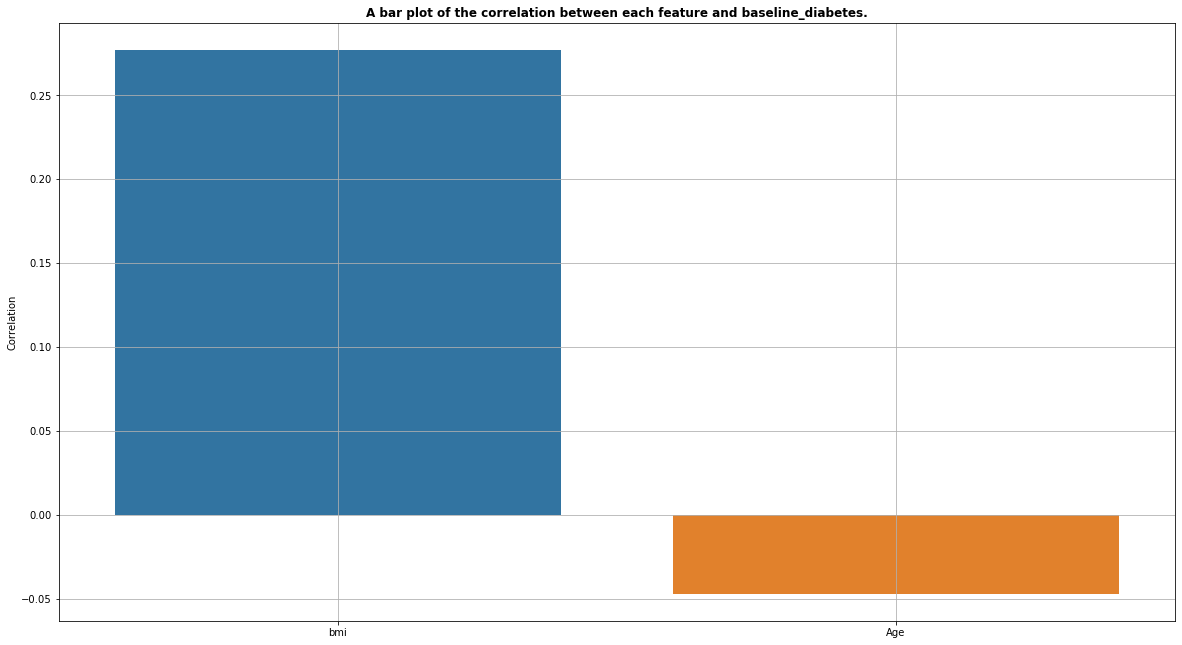

In [22]:
corr = pd.DataFrame(Surgical_data1[Surgical_data1.columns[0:]].corr()['baseline_diabetes'][:])
plt.figure(figsize=(20,11))
corr = corr.drop(index='baseline_diabetes')
corr.columns = ['Correlation']
sns.barplot(corr.index, corr.Correlation)
plt.grid()
plt.title("A bar plot of the correlation between each feature and baseline_diabetes.", fontweight="bold")
corr

In [23]:
X = Surgical_data1.drop(["baseline_diabetes"], axis=1)
y = Surgical_data1['baseline_diabetes']
print(y.head())
X.head()

0    0
1    0
2    0
3    1
4    0
Name: baseline_diabetes, dtype: int64


,bmi,Age
0,19.31,59.2
1,18.73,59.1
2,21.85,59.0
3,18.49,59.0
4,19.70,59.0


In [24]:
import warnings
warnings.filterwarnings('ignore')

def train_predict(X, y, model, verbose=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_mat =  confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    probs = model.predict_proba(X_test)
    
    print("Accuracy Score of the SVM classifier: \n", acc)
    print("The confusion Matrix: \n", conf_mat)
    print("Recall = ", recall_score(y_test, y_pred))
    print("F1_score = ", f1_score(y_test, y_pred))
    
    #plot the heatmap for the confusio matrix.
    #visuals ease comprehension of information and this justifies why 
    #I want a heatmap to be produced each time this functions is used.
    if verbose:
        plt.figure(figsize=(8,8))
        sns.heatmap(conf_mat, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
    return X_test, y_test, y_pred, probs

Accuracy Score of the SVM classifier: 
 0.8780321147933037
The confusion Matrix: 
 [[2570    0]
 [ 357    0]]
Recall =  0.0
F1_score =  0.0


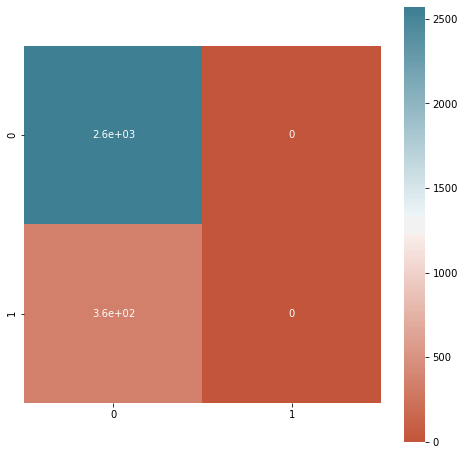

In [25]:
diabetes_classifier = svm.SVC(probability=True)
xtest, ytest, y_pred, probs = train_predict(X, y, diabetes_classifier, verbose=True)

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_cur(probs, y_test):
    
    """
    Inputs: probs, precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
#print(precision)
#print(recall)
#print(thresholds)
plt.plot(recall,precision)
plt.show()precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
#print(precision)
#print(recall)
#print(thresholds)
plt.plot(recall,precision)
plt.show()
            y_test is the target variable in the testing set.
    Functionality: - extracts probabilities of getting a 1 from probs
                   - calculates the area under the curve(AUC)
                   - prints the AUC
                   - generate the false positives and true oisitives rates 
                     (FPR and TPR) with the roc_curve function.
                   - plots the graph of TPR against FPR which is the receiver
                     operating characteristics curve.
    Outputs: returns nothing but displays the ROC curve
    """
    probs = probs[:, 1]
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.2f' % auc)
    
    fig, ax = plt.subplots(figsize=(20,13))
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, color='blue',LineWidth = 3, label='ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Area Under the Receiver Operating Characteristics Curve,")
    plt.grid()
    plt.legend()
    plt.show()

AUC: 0.58


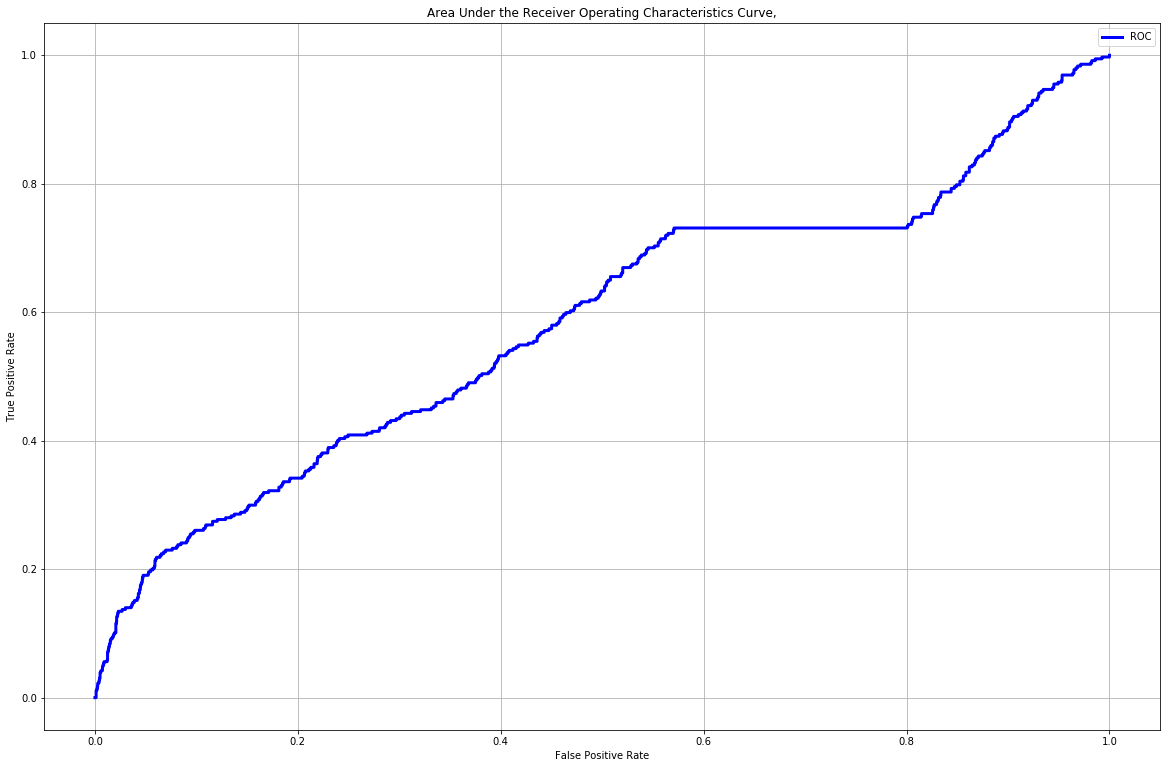

In [21]:
plot_roc_cur(probs, ytest)

In [27]:
from imblearn.over_sampling import SMOTE
def SMOTE_resampling(X, y):
    """
    Inputs: X the data set of all explanatory variables
            y in the target variable
            
    Functionality: This function is used when there is imablance in the data set.
                   It uses the SMOTE resampling method to generate synthetic points from the minority
                   class to increase it's cardinality.
    Outputs: The output is a data set(data frame) of explanatory variables and the target variable with increased
             number of data points in the minority class.
    """
    smote = SMOTE(random_state = 42)
    x_resampled, y_resampled = smote.fit_resample(X, y)
    return x_resampled, y_resampled

In [28]:
x_resampled, y_resampled = SMOTE_resampling(X, y)
Xtest, ytest, y_pred, probs = train_predict(x_resampled, y_resampled, diabetes_classifier)

Accuracy Score of the SVM classifier: 
 0.7235282688945016
The confusion Matrix: 
 [[1536 1031]
 [ 392 2188]]
Recall =  0.8480620155038759
F1_score =  0.754612864286946


In [24]:
import statsmodels.api as sm
def forward_regression(X, y, threshold_in, verbose=False):
    """
    Inputs: X the data set of all explanatory variables
            y in the target variable
            threshold_in represents the maximum value of the p_value
            for a variable to be considered important.
            verbose permits the printing ot the selected variables and their
            corresponding accuracies.
    Functionality: This is forward regression implementation which starts with an empty 
                   set of feautures. The most important feautures are determined using 
                   the ordinary least squares(OLS) regression method. OLS determines the
                   importance of each variable using the principle of least squares. The 
                   OLS calculates the p-valeu and compare with the threshold which is specified.
                   A variable with a p-value lower than the threshold is considered to have a 
                   significant effect on the target variable.
    Outputs: returns a list of the most important feautures in the data set
    """
    included = []
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

Add  bmi                            with p-value 6.7061e-256
Accuracy Score of the SVM classifier: 
 0.677870604235477
The confusion Matrix: 
 [[1848  719]
 [ 939 1641]]
Recall =  0.6360465116279069
F1_score =  0.6643724696356275


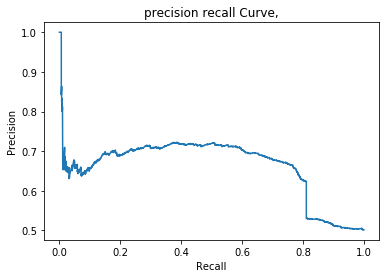

In [88]:
#get the list of selected variables
selected_vars = forward_regression(X, y, 0.05, verbose =True)
#get the least of the least important variables that were not selected
not_slected_vars =[var for var in X.columns if var not in selected_vars]
#drop the leasr important variables from the data set
X_new = X.drop(not_slected_vars, axis = 1)
#resample the data with the selected variables
x_resampled, y_resampled = SMOTE_resampling(X_new, y)
#train and predict with the resampled selected features.
xtest, ytest, y_pred, probs = train_predict(x_resampled, y_resampled, diabetes_classifier)

# plot precision recall curve
precision, recall, thresholds = precision_recall_curve(ytest, prob_class_1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("precision recall Curve,")  
plt.plot(recall,precision)
plt.show()


In [29]:
# use the misclass rate feature to analysis this model
def misclass_rate_feature(
    test_dataset,
    test_predictions,
    feature,
    categorical=False,
    bins=10,
    bins_type="regular",
):
    """Computes the misclassification rate as a function of the feature values.
    This function allows to compute the misclassification rate of a sample for
    the values of any particular feature.
    The function allows any binning for this calculation, which means that
    regularly spaced binnings, disparately spaced binnings that correspond to
    sets of an equal amount of data points (such as quartiles, deciles, or
    n-quantiles), or any other arbitrary irregular binning can be used.
    When the full dataset with all points does not have any data point in an
    interval corresponding to a certain bin, the function yields a "nan" value
    for the misclassification rate to prevent a zero division error and also to
    distinguish the bins without information from the bins with a zero
    misclassification rate. The same happens with the standard deviation when
    either the full dataset with all points or the dataset with only the
    misclassified points do not have any data point in a certain bin interval.
    Parameters:
        test_dataset: Dataset with the features of all data points, where the
            true class is at the last column.
        test_predictions: List of the predicted classes for all data points.
        feature: Column name in the dataset of the feature.
        categorical (bool): Indicates whether it is a categorical feature.
            Default is "False".
        bins (int, list, str):
            * If an integer, this indicates the number of bins (default value is
            10). Whether this corresponds to dividing the feature scale in
            regularly spaced bins (default) or into quantiles, it must be
            specified in the parameter "bins_type".
            * If the string "quartiles" or "deciles" is used, then it
            automatically computes the appropriate bin edge postions to optimize
            for a quartile or decile grouping.
            * If any other feature intervals are needed, then a list of the
            feature values corresponding to the positions separating the bins
            and including the outermost edges must be provided.
        bins_type (str): If the bins parameter is an integer with the number
            of bins, this parameter allows to specify whether these bins should
            be "regular" evenly spaced bins or "quantiles". Default value is
            "regular".
    Returns:
        Three elements which correspond to:
            1) The edges of the bins in the feature scale.
            2) The misclassification rate in each bin.
            3) The standard deviation of the misclassification rate in that bin.
    """
    # Builds dataset with only the misclassified data points
    test_dataset_misclass = test_dataset[test_dataset.iloc[:, -1] != test_predictions]

    if categorical is False:

        # Computes position of bin edges for quartiles or deciles
        if bins == "quartiles":
            bins = compute_quantiles(test_dataset, feature, quantiles=4)
        elif bins == "deciles":
            bins = compute_quantiles(test_dataset, feature, quantiles=10)
        elif type(bins) == int and bins_type == "quantiles":
            bins = compute_quantiles(test_dataset, feature, quantiles=bins)

        # Histogram of all points
        total_histogram_counts, bins = np.histogram(test_dataset[feature], bins)

        # Histogram of misclassified points
        misclass_histogram_counts, bins = np.histogram(
            test_dataset_misclass[feature], bins
        )

    else:
        # Histogram of all points for categorical features
        total_histogram_counts = test_dataset[feature].value_counts().sort_index()

        # Histogram of misclassified points for categorical features
        correct_class_histogram_counts = test_dataset[
            test_dataset.iloc[:, -1] == test_predictions
        ]
        misclass_histogram_counts = total_histogram_counts.subtract(
            correct_class_histogram_counts[feature].value_counts(), fill_value=0
        )

        bins = np.asarray(misclass_histogram_counts.index)
        misclass_histogram_counts = np.asarray(misclass_histogram_counts)
        total_histogram_counts = np.asarray(total_histogram_counts)

    # Compute misclassification rate

    # The standard deviation in a counting experiment is N^(1/2).
    # According to error propagation the error of a quotient X=M/N is:
    # ErrorX = X(ErrorM/M + ErrorN/N),
    # here, Error_rate = rate*(M^(-1/2)+N^(-1/2))

    misclass_rate_histogram = np.copy(misclass_histogram_counts)

    rate = []
    standard_deviation = []
    for index in range(len(total_histogram_counts)):
        if total_histogram_counts[index] != 0:
            index_rate = misclass_rate_histogram[index] / total_histogram_counts[index]
            rate += [index_rate]
            if misclass_rate_histogram[index] != 0:
                standard_deviation += [
                    index_rate
                    * (
                        total_histogram_counts[index] ** (-1.0 / 2)
                        + misclass_rate_histogram[index] ** (-1.0 / 2)
                    )
                ]
            else:
                standard_deviation += [float("nan")]
        else:
            rate += [float("nan")]
            standard_deviation += [float("nan")]
    misclass_rate_histogram = rate

    return bins, misclass_rate_histogram, standard_deviation

def show_misclass_rate_feature(
    test_dataset,
    test_predictions,
    feature,
    categorical=False,
    bins=10,
    bins_type="regular",
    width_fraction=1.0,
    show_sd=False,
):
    """Displays the misclassification rate for the values of a certain feature.
    Parameters:
        test_dataset: Dataset with the features of all data points, where the
            true class is at the last column.
        test_predictions: List of the predicted classes for all data points.
        feature: Column name in the dataset of the feature.
        categorical (bool): Indicates whether it is a categorical feature.
            Default is "False".
        bins (int, list):
            * If an integer, this indicates the number of bins (default value is
            10). Whether this corresponds to dividing the feature scale in
            regularly spaced bins (default) or into quantiles, it must be
            specified in the parameter "bins_type".
            * If the string "quartiles" or "deciles" is used, then it
            automatically computes the appropriate bin edge postions to optimize
            for a quartile or decile grouping.
            * If any other feature intervals are needed, then a list of the
            feature values corresponding to the positions separating the bins
            and including the outermost edges must be provided.
        bins_type (str): If the bins parameter is an integer with the number
            of bins, this parameter allows to specify whether these bins should
            be "regular" evenly spaced bins or "quantiles". Default value is
            "regular".
        width_fraction (float): Fraction of the bin occupied by the bar.
        show_sd (bool): Whether the graph should display the standard deviation.
            Default is "False".
    """
    result_edges, result_rate, result_sd = misclass_rate_feature(
        test_dataset, test_predictions, feature, categorical=categorical, bins=bins
    )
    if categorical is False:
        width = np.diff(result_edges)
        width_interval = [bin * width_fraction for bin in width]
        result_edges = result_edges[:-1]
        alignment = "edge"
    else:
        result_edges = [str(item) for item in result_edges]
        alignment = "center"
        width_interval = 1

    plt.ylim(0, 1)
    plt.xlabel(feature)
    plt.ylabel("Misclassification rate")
    if show_sd:
        plt.bar(
            result_edges,
            result_rate,
            yerr=result_sd,
            width=width_interval,
            bottom=None,
            align=alignment,
            edgecolor="white",
            linewidth=2,
        )
    else:
        plt.bar(
            result_edges,
            result_rate,
            width=width_interval,
            bottom=None,
            align=alignment,
            edgecolor="white",
            linewidth=2,
        )
    plt.show(block=False)


def show_misclass_rates_features(
    test_dataset, test_predictions, bins=10, show_sd=False
):
    """Displays the misclassification rate for the values of each feature.
    Parameters:
        test_dataset: Dataset with the features of all data points, where the
            true class is at the last column.
        test_predictions: List of the predicted classes for all data points.
        bins (int, list):
            * If an integer, it divides the feature scale in regularly spaced
            bins (default value is 10).
            * If the string "quartile" is used, then it automatically computes
            the appropriate bin edge postions to optimize for a quartile
            grouping.
            * If any other feature intervals are needed, then a list of the
            feature values corresponding to the positions separating the bins
            and including the outermost edges must be provided.
        show_sd (bool): Whether the graph should display the standard deviation.
            Default is "False".
    """
    # List of features
    feature_list = list(test_dataset.columns)[:-1]

    # Computes position of bin edges for quartiles or deciles
    for feature in feature_list:
        show_misclass_rate_feature(
            test_dataset, test_predictions, feature, bins=bins, show_sd=show_sd
        )


def compute_quantiles(dataset, feature, quantiles=4):
    """Computes optimal feature values to obtain n-quantiles.
    This function tries to determine the optimal feature value ranges in order
    to obtain groups of data of similar sizes (i.e. with an equal amount of
    samples), despite corresponding to feature intervals of different sizes.
    Very often this is not strictly possible. In particular, when the precision
    of the feature is small and many data points share the same feature values
    (i.e. the feature behaves as pseudo-discrete). In this case, these large
    subsets of data points sharing the same value either get all counted in one
    bin or they get all counted in another. Which makes it impossible to
    perfectly equilibrate the different groups.
    To arbitrarily split between two contiguous bins a subset of data points
    with the same feature value is not acceptable if different histograms and
    distributions have to be compared, or if normalization or other operations
    among them have to be carried out.
    Parameters:
        dataset (DataFrame): Data to try to chop in equal sets.
        feature: Column name in the dataset of the feature.
        quantiles (int): Number of equally-sized groups into which to try to
            divide the sample. For quartiles use 4, for deciles use 10, etc.
            Default value is 4.
    Returns:
        edge_values (list): List of the optimal edge positions.
    """
    list_quantiles = np.arange(quantiles + 1) / quantiles

    edge_values = np.quantile(dataset[feature], list_quantiles)
    return edge_values


def show_quantiles_feature(dataset, feature, quantiles=4, width_fraction=1.0):
    """Plots the best attempt to obtain n-quantiles for a feature.
    This function shows the different quantiles computed for one of the features
    in order to assess whether the data that is being used really allows for
    that particular number of quantiles to have a similar size or not.
    Parameters:
        dataset (DataFrame): Data to try to chop in equal sets.
        feature: Column name in the dataset of the feature.
        quantiles (int): Number of equally-sized groups into which to try to
            divide the sample. For quartiles use 4, for deciles use 10, etc.
            Default value is 4.
        width_fraction (float): Fraction of the bin occupied by the bar.
    """
    quantiles_feature = compute_quantiles(dataset, feature, quantiles=quantiles)
    total_histogram = np.histogram(dataset[feature], bins=quantiles_feature)
    width = [
        total_histogram[1][index + 1] - total_histogram[1][index]
        for index in range(len(total_histogram[0]))
    ]
    width_interval = [bin * width_fraction for bin in width]

    plt.xlabel(feature)
    plt.ylabel("counts")
    plt.bar(
        total_histogram[1][:-1],
        total_histogram[0],
        width=width_interval,
        bottom=None,
        align="edge",
        edgecolor="white",
        linewidth=3,
    )
    plt.show(block=False)


def show_quantiles_features(test_dataset, quantiles=4, width_fraction=1.0):
    """Plots the best attempt to obtain n quantiles for all features.
    This function shows the different quantiles computed for each one of the
    features in order to assess whether the data that is being used really
    allows for that particular number of quantiles to have a similar size for
    that feature or not.
    Parameters:
        dataset (DataFrame): Data to try to chop in equal sets.
        quantiles (int): Number of equally-sized groups into which to try to
            divide the sample. For quartiles use 4, for deciles use 10, etc.
            Default value is 4.
    """
    # List of features
    feature_list = list(test_dataset.columns)[:-1]

    for feature in feature_list:
        show_quantiles_feature(
            test_dataset, feature, quantiles=quantiles, width_fraction=width_fraction
        )

In [30]:
testset = pd.concat([Xtest, ytest], axis=1)
print(testset.columns)
print(list(testset.columns))
print(list(testset.columns)[:-1])
#feature_list = list(test_dataset.columns)[:-1]

Index(['bmi', 'Age', 'baseline_diabetes'], dtype='object')
['bmi', 'Age', 'baseline_diabetes']
['bmi', 'Age']


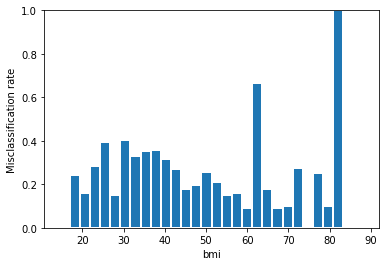

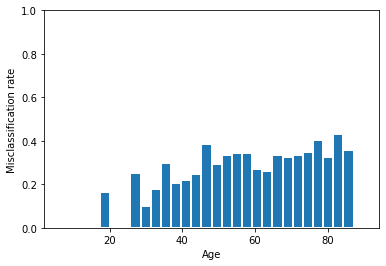

In [31]:
show_misclass_rates_features(testset,y_pred,bins=30)
# plt.plot(misclass_rate_histogram)
# plt.xlabel("bmi bin")
# plt.ylabel('Frequency')
# plt.title('bmi binned misclassification Histogram')
# print(bins)
# print(standard_deviation)
